# ASTR 412 - Week 3:  "Data Querying and Visualization"

Today we'll learn how to interface with the SDSS database, and retrieve and visualize data.

# I. Visualizing Data

#### The standard Python library for plotting and visualization is called "Matplotlib".  Below are a few examples showing what it can do.  An excellent tutorial can be found here: https://www.labri.fr/perso/nrougier/teaching/matplotlib/


In [1]:
# import matplotlib and some of its modules

import matplotlib
%config InlineBackend.rc = {}
from matplotlib import pylab as plt
%matplotlib inline
print('OK')

OK


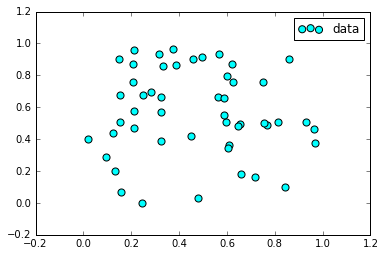

In [2]:
"""
Simple demo of a scatter plot.
http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
"""
import numpy as np

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x,y, s = 50,c='cyan', label = 'data')
plt.legend()
plt.show()

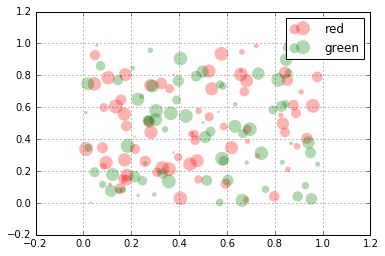

In [3]:
"""
Simple demo of a scatter plot.
http://matplotlib.org/examples/lines_bars_and_markers/scatter_with_legend.html
"""

import matplotlib.pyplot as plt
from numpy.random import rand


fig, ax = plt.subplots()
for color in ['red', 'green']:
    n = 75
    x, y, z = rand(3,n)
    #x = rand(n)
    #y = rand(n)
#    print (len(x))
    scale = 200.0 * rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

Sample size: 1000
Mean: -0.01
Median: 0.04


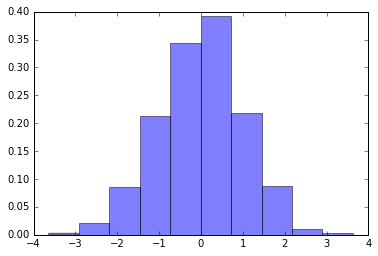

In [4]:
"""
Simple demo of a histogram.
http://matplotlib.org/examples/frontpage/plot_histogram.html
"""

# Let's make a random normal (Gaussian) distribution, centered on 0, with a standard deviation of 1
mu = 0
sigma = 1
samplesize = 1000
s = np.random.normal(mu,sigma, samplesize)

print ("Sample size: {:.0f}".format(samplesize))
print ("Mean: {:.2f}".format(np.mean(s)))
print ("Median: {:.2f}".format(np.median(s)))

## make a histogram of the data
#count, bins, ignored = plt.hist(s, 30, normed=True, alpha = 0.5)
## overlay a Gaussian model, using the mean and standard deviation (sigma)
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
## display the data
#plt.show()

plt.hist(s, bins=10, color='blue', normed='True', alpha=0.5)
plt.show()

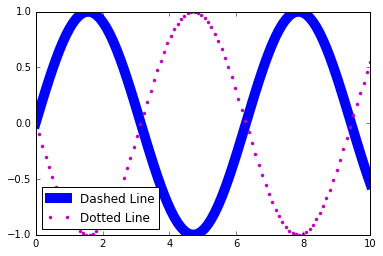

In [5]:
"""
Demo of a simple plot with a custom dashed line.

"""
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)  # makes an array of 100 evenly spaced points between 0 and 10

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-', linewidth=10, label='Dashed Line')
ax.plot(x, -1 * np.sin(x), '.', color='m', linewidth=0.2, label='Dotted Line')

ax.legend(loc='lower left')
plt.show()

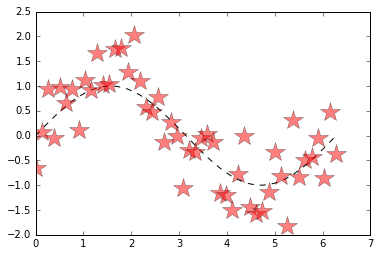

In [6]:
"""
Plot simulated data and a model curve

"""


# let's start by making some data to plot:
x = np.linspace(0, 2*np.pi, 50)  # here we are making an array of length 50, ranging from 0-2pi
y = np.sin(x) # we will set up another array, which is the sin() of the array X

# here we will make another array just like 'Y', but with random scatter
y2 = y + 0.5 * np.random.normal(size=x.shape) 

# here we'll set up the plotting area
fig, ax = plt.subplots()

# here we'll plot x vs y
# formatting information:  'k' = black; '--' = dashed
ax.plot(x, y, 'k--')

# and we'll plot x vs. y2
# formatting information: 'r' = red; 'o' = circles
ax.plot(x, y2, 'r*', markersize=20, alpha=0.5)

"""
# If you want to, you can play around with the formats and labels of the ticks and axes
ax.set_xlim((0, 2*np.pi))
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(['0', '$\pi$', '2$\pi$'])
ax.set_ylim((-1.5, 1.5))
ax.set_yticks([-1, 0, 1])

# Only draw spine between the y-ticks
ax.spines['left'].set_bounds(-1, 1)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
"""

plt.show()

#### EXPERIMENT: Try chaning the formatting of the points and lines on the plot.  You can find more examples here: http://matplotlib.org/users/screenshots.html

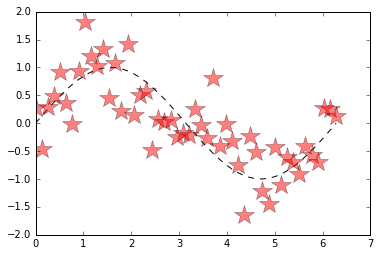

In [7]:
"""
Plot simulated data and a model curve
"""
# let's start by making some data to plot:
x = np.linspace(0, 2*np.pi, 50)  # here we are making an array of length 50, ranging from 0-2pi
y = np.sin(x) # we will set up another array, which is the sin() of the array X

# here we will make another array just like 'Y', but with random scatter
y2 = y + 0.5 * np.random.normal(size=x.shape) 

# here we'll set up the plotting area
fig, ax = plt.subplots()

# here we'll plot x vs y
# formatting information:  'k' = black; '--' = dashed
ax.plot(x, y, 'k--')

# and we'll plot x vs. y2
# formatting information: 'r' = red; 'o' = circles
ax.plot(x, y2, 'r*', markersize=20, alpha=0.5)

"""
# If you want to, you can play around with the formats and labels of the ticks and axes
ax.set_xlim((0, 2*np.pi))
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(['0', '$\pi$', '2$\pi$'])
ax.set_ylim((-1.5, 1.5))
ax.set_yticks([-1, 0, 1])

# Only draw spine between the y-ticks
ax.spines['left'].set_bounds(-1, 1)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
"""
plt.show()

# II. Importing SciServer and other important libraries
The SciServer team has written a number of libraries, generally prefixed with "SciServer", that assist in various functions. As with all Python libraries, they must be actively imported before being used.
The next code block imports those, together with some standard Python libraries helpful for scientific analysis. The code block below applies some settings you may find helpful.

In [2]:
# Import Python libraries to work with SciServer (see http://www.sciserver.org/docs/sciscript-python/)

import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SkyServer as SkyServer # show individual objects through SkyServer
import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work
import numpy as np                  # standard Python library for math operations
import pandas                       # package for structuring and visualizing data
import matplotlib.pyplot as plt     # package for graphing and visualization 
print('SciServer libraries imported')

SciServer libraries imported


In [3]:
# Apply some special settings to the imported libraries

# ensures columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

Settings applied


If you don't receive any errors after running the blocks of code above, you can try playing around with the libraries.  Shown below are a few examples of figures that can be made using Matplotlib.  This [thumbnail gallery](http://matplotlib.org/1.2.1/gallery.html) is useful for finding example code for making just about any kind of plot or visualization you can think of. If you're a fan of [XKCD](http://xkcd.com/), you can also XKCD-ify your plots with the code found [here](http://matplotlib.org/xkcd/gallery.html) :)

#### III. Querying an astronomy database (SDSS DR14)
The next code block searches the SDSS Data Release 14 database via the CasJobs REST API. The query completes quickly, so it uses CasJobs quick mode.
CasJobs also has an asynchronous mode, which will submit job to a queue and will store the results in a table in your MyDB. If your results are very large, it will store the results in MyScratchDB instead.

Run the code block below to query DR14. Try changing some of the query parameters at the top of the code block below to see how the output changes.

Documentation on the SciServer Python libraries can be found on the SciServer Python documentation site at:
http://www.sciserver.org/docs/sciscript-python/

An extensive tutorial on how to query the SDSS database can be found here:
http://cas.sdss.org/dr14/en/help/howto/search/searchhowtohome.aspx

In [4]:
# Find objects in the Sloan Digital Sky Survey's Data Release 14.
#
# Query the Sloan Digital Sky Serveys' Data Release 14.
# For the database schema and documentation see http://skyserver.sdss.org/dr14
#
# This query finds "a 4x4 grid of nice-looking galaxies": 
#   galaxies in the SDSS database that have a spectrum 
#   and have a size (petror90_r) larger than 10 arcsec.
# 
# First, store the query in an object called "query"
query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.g, p.r
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17  AND p.petror90_r > 10
"""
gals = CasJobs.executeQuery(query, "dr14")
gals = gals.set_index('objId')
gals

,ra,dec,petror90_r,g,r
objId,,,,,
1237645941824356443,40.285690,-0.714957,14.72862,15.75164,15.03100
1237645943978393694,55.123625,0.872487,18.85110,16.52947,15.61466
1237645943979114622,56.847420,0.875488,15.66479,15.89510,14.91003
1237645943979311221,57.248385,0.925979,14.60275,16.25293,15.26318
1237646588246688297,80.135126,1.186679,11.14294,16.93802,15.98980
1237648672921485632,243.708876,-0.915653,15.01578,15.69639,14.77024
1237648672922337955,245.700633,-0.844301,10.51866,16.38026,15.51751
1237648672922468973,246.015172,-0.902869,10.80825,16.31037,15.54011
1237648673459077169,245.367353,-0.457074,11.18379,16.31978,15.37991


#### EXPERIMENT:  What happens if you change the query?

Try changing the query in the following ways: 
- Return 8 matching objects insetad of 16.
- Select only nearby galaxies (redshift < 0.05).
- Select only galaxies likely to be spirals (with u-r color >= 2.22)
- Search for galaxies in SDSS Data Release 10 instead of DR14.

What changes do you notice in the table of returned results?

Try it in the code block below:

In [6]:
# Find objects in the Sloan Digital Sky Survey's Data Release 14.
# First, store the query in an object called "query"
query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.g, p.r
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17
  AND p.petror90_r > 10
"""
gals = CasJobs.executeQuery(query, "dr14")
gals = gals.set_index('objId')
gals

,ra,dec,petror90_r,g,r
objId,,,,,
1237648704068649509,248.295368,-0.213270,21.32009,15.31717,14.67453
1237648705142391718,248.417182,0.632462,10.59196,16.64985,15.67168
1237655549133587015,248.563406,-0.947123,10.90129,16.88008,15.95552
1237648673459077169,245.367353,-0.457074,11.18379,16.31566,15.37856
1237648673995686549,244.875590,-0.038526,12.17980,16.84451,15.96009
1237648673459667234,246.782081,-0.492432,11.98310,15.90711,15.02164
1237648675069952782,246.004069,0.790919,21.29697,15.61854,14.68705
1237648675606430099,245.086634,1.228436,12.29040,15.62880,15.09710
1237648705141015074,245.177248,0.516165,10.60209,15.98777,15.33128


# IV. Visualizing Returned Data
Now that we have run the query and stored the results, we can start analyzing the results.

Start by making a simple plot of positions, using the default query from step 3 (select top 16... AND p.petror90_r > 10).

What do you see?

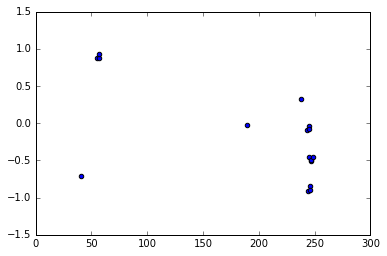

In [12]:
# Try making an Ra, Dec scatter plot...
plt.scatter(gals['ra'], gals['dec'])
plt.show() 

#### EXPERIMENT: How can you improve the graph?

The graph you just made visualizes your data in the simplets possible way: as a scatterplot of (ra/dec) positions with default graphing parameters. But you could make many other possible graphs, and you can always add labels, change axis scales, or adjust many other features of graphs. You practiced making some of these display changes in the sections above. Full details on all the possible graph options are described in the online documentation for the pyplot module at http://matplotlib.org/api/pyplot_summary.html.


Try changing the code block below in the following ways. What changes do you notice in the plot?
- Add axis labels
- Change the scales of both axes to zoom in on the cluster of points around ra = 250
- Increase the font size of the numbers and the axis labels
- Add a title above the graph
- Plot galaxies out to dec = +/-5 (change the display axes as well)

Next, try making some other plots. Add any labels and titles that will help the reader interpret your graphs.
- Plot a histogram of the g-band magnitudes
- Plot a color-color diagram with g on the x-axis and r on the y-axis
- Create graphs with 1,000 objects instead of just 16 (note this will require changing the query above and re-running both blocks)

Try it in the code block below:

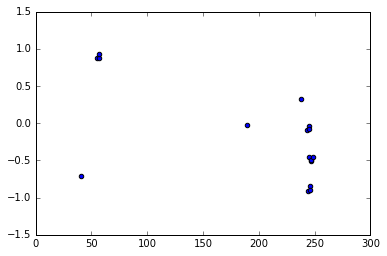

In [13]:
# make scatterplot
#plt.scatter(gals['g'],gals['r'])

# create an overall figure object (fig) and an "axis" object to display this data (ax)
fig, ax = plt.subplots()

# This graph is associated with the axis object
ax.scatter(gals['ra'], gals['dec'])

# Add formatting options here. Some may apply to fig and others to ax.

# Show the graph will all the options you set.
plt.show()

## Let's make a color-magnitude diagram of galaxies

In [16]:
# enter query
query="""
SELECT TOP 1000 p.objId,p.ra,p.dec,p.petror90_r, p.u,p.g,p.r,p.i,p.z
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17
  AND p.petror90_r > 10
"""
# send query to CasJobs
gals = CasJobs.executeQuery(query, "dr14")
# show results
gals

,objId,ra,dec,petror90_r,u,g,r,i,z
0,1237648720149217496,162.204214,-0.987362,16.14926,17.80165,16.61996,16.11810,15.85237,15.64157
1,1237648720149217569,162.289475,-0.908549,11.28101,18.66761,16.83642,15.95352,15.51473,15.16474
2,1237648720149348494,162.586297,-0.873837,11.16746,18.81535,16.69037,15.70883,15.31833,14.85697
3,1237648720150003983,164.000141,-0.954822,11.88745,18.39349,16.53366,15.56921,15.09200,14.71846
4,1237648720150724863,165.740634,-0.962114,13.83384,16.99432,15.79183,15.27985,14.97925,14.76970
5,1237648720151183470,166.697790,-0.924148,13.02234,17.58879,15.76081,14.95930,14.55726,14.24744
6,1237648720151183582,166.713092,-0.998872,10.97690,18.78704,16.80903,15.79539,15.31342,14.94918
7,1237648720151642325,167.719094,-1.030512,10.54622,18.41599,16.59383,15.68014,15.24811,14.90371
8,1237648720151642345,167.752529,-0.893033,11.74891,17.82171,16.18506,15.35982,14.81807,14.51594
9,1237648720152231990,169.141793,-1.028029,11.55226,18.31851,16.30556,15.33855,14.87719,14.51697


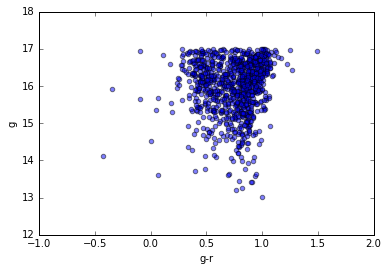

In [19]:
# make scatterplot
gal_color = gals['g']-gals['r']
gal_mag = gals['g']
plt.scatter(gal_color, gal_mag, alpha=0.5)
plt.xlabel('g-r')
plt.ylabel('g')
plt.show() 